<a href="https://colab.research.google.com/github/smiles1313/M148FinalProject/blob/main/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Code Notebook

GitHub repository: https://github.com/smiles1313/M148FinalProject

## 1. Dataset

Our team analyzed a heart failure dataset. This dataset contains features relevant to cardiovascular disease/risk detection. Our goal was to predict mortality by heart failure.

#### a. Features

The main features in the data that we studied were age, high blood pressure, smoking, and other factors that appeared in the EDA process. We want used these features to find predictors of cardiovascular disease risk.

#### b. Import Libraries and Set Seed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc
import lightgbm as lgb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


SEED = 42

import os
import random
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

#### c. Load Data

In [ ]:
#upload the data file (.csv) from the github repo into the Colab before running

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')


#### d. A Glance at the Data

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### e. Data Cleaning

In [ ]:
print('Number of Missing Values:\n', df.isnull().sum())

Number of Missing Values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
print(f"\nNumber of duplicates: ", df.duplicated().sum())


Number of duplicates:  0


## 2. Exploratory Data Analysis

#### a. `DEATH_EVENT` (Mortality) Distribution

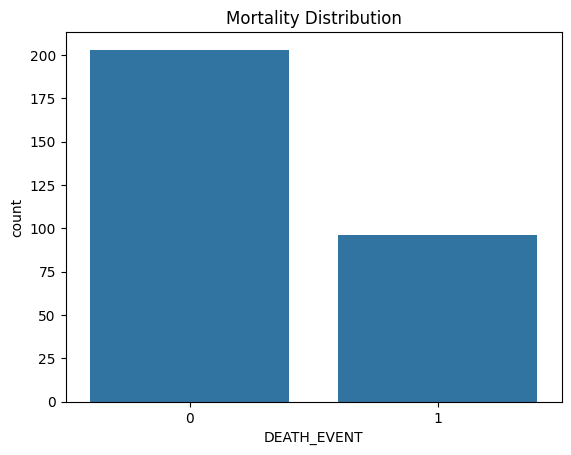

In [ ]:
target = "DEATH_EVENT"

df[target].value_counts()
df[target].value_counts(normalize=True)

sns.countplot(x=target, data=df)
plt.title("Mortality Distribution")
plt.show()

#### b. Summary Statistics

* Overall



In [ ]:
#All variables are encoded numerically

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


* By `DEATH_EVENT`

In [ ]:
df.groupby(target).mean().T

DEATH_EVENT,0,1
age,58.761906,65.215281
anaemia,0.408867,0.479167
creatinine_phosphokinase,540.054187,670.197917
diabetes,0.418719,0.416667
ejection_fraction,40.266010,33.468750
high_blood_pressure,0.325123,0.406250
platelets,266657.489901,256381.044792
serum_creatinine,1.184877,1.835833
serum_sodium,137.216749,135.375000
sex,0.650246,0.645833


#### c. Scatterplots Related to Age

<Axes: xlabel='age', ylabel='time'>

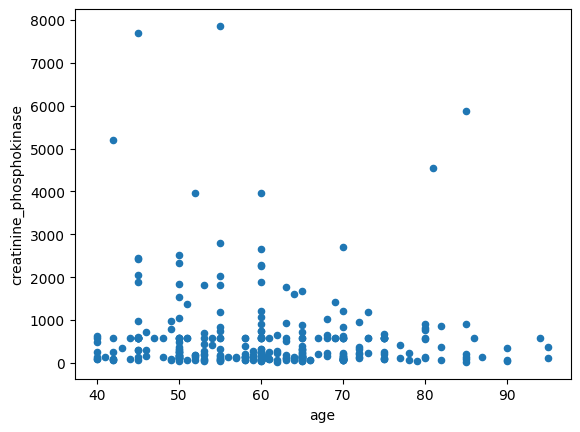

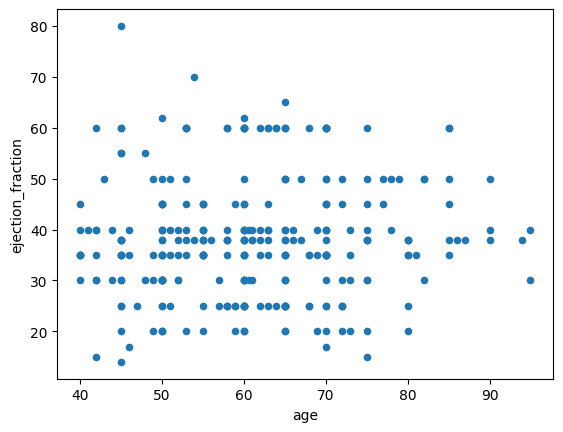

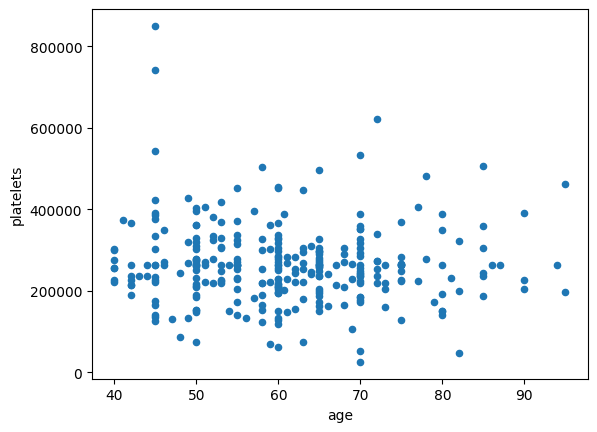

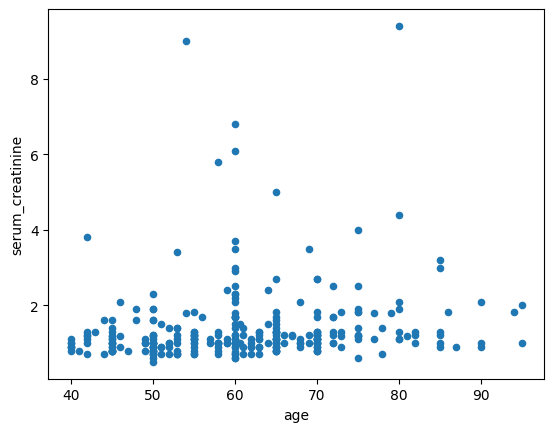

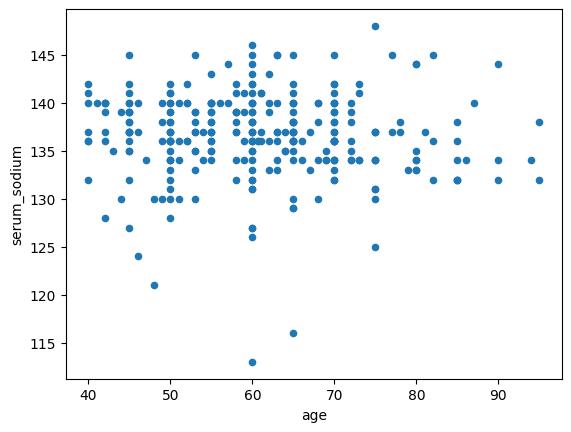

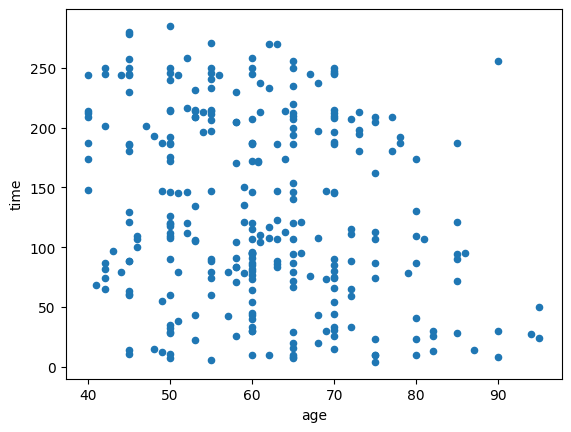

In [ ]:
#applied visual representation of data as a scatter plot to see any outliers or trends
#no definitive predictors based off scatter plots - will have to try other visualizations to find predictors

pd.DataFrame(df).plot.scatter(x='age', y='creatinine_phosphokinase')
pd.DataFrame(df).plot.scatter(x='age', y='ejection_fraction')
pd.DataFrame(df).plot.scatter(x='age', y='platelets')
pd.DataFrame(df).plot.scatter(x='age', y='serum_creatinine')
pd.DataFrame(df).plot.scatter(x='age', y='serum_sodium')
pd.DataFrame(df).plot.scatter(x='age', y='time')

#### d. Variable Distributions

* Histograms

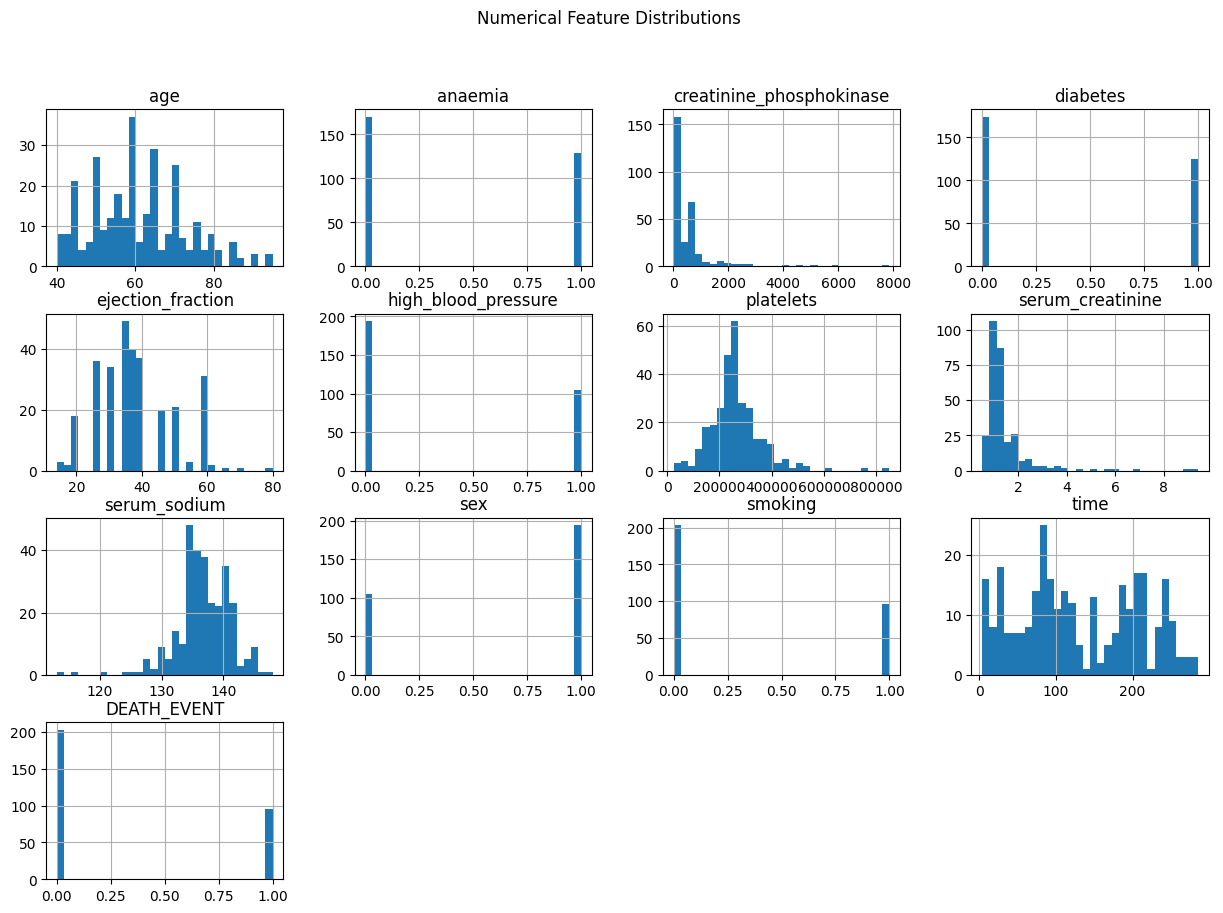

In [ ]:
df.hist(figsize=(15,10), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()

* Density by `DEATH EVENT` (Morality)

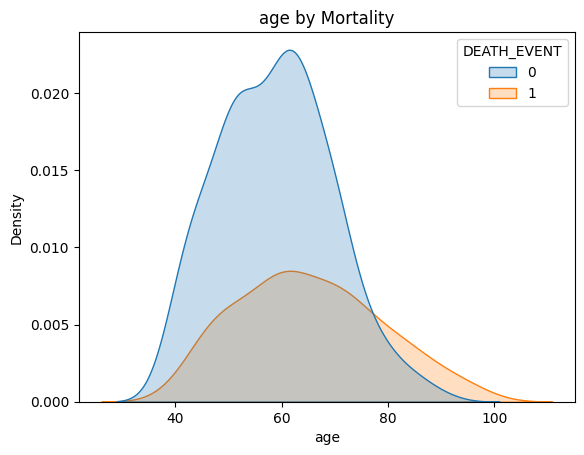

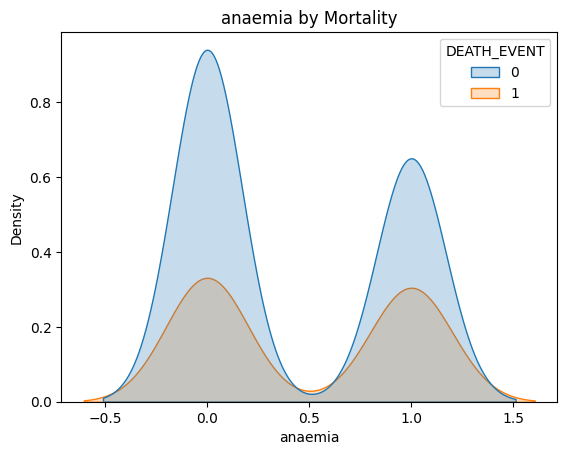

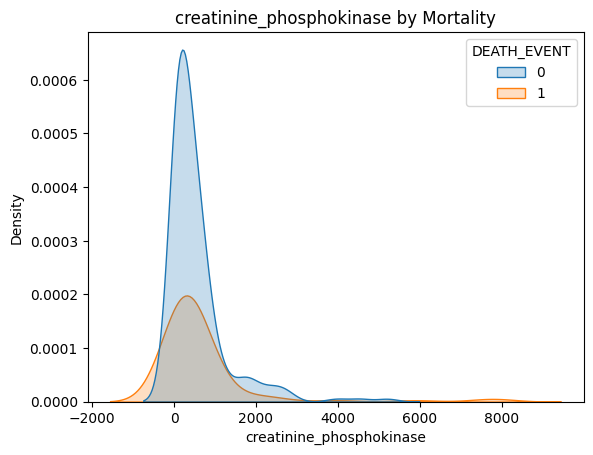

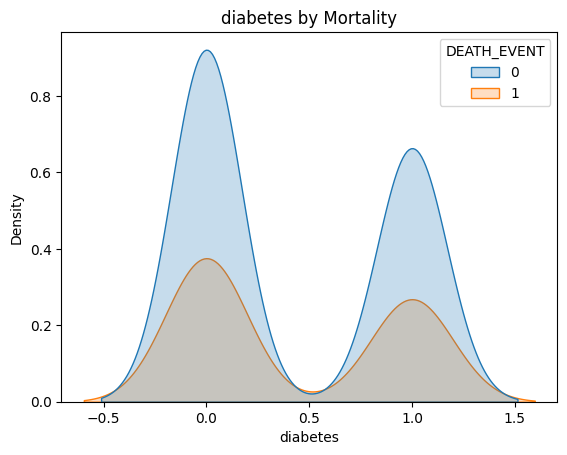

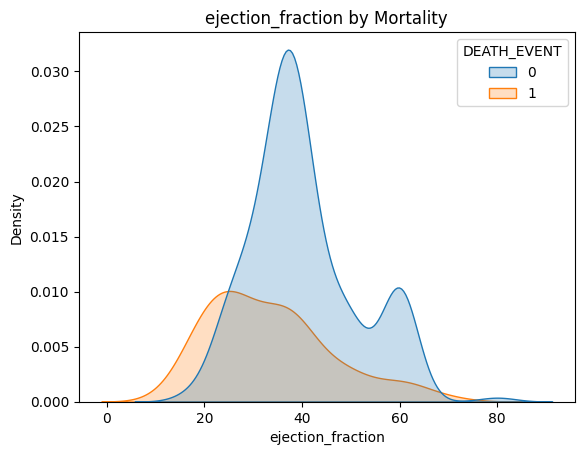

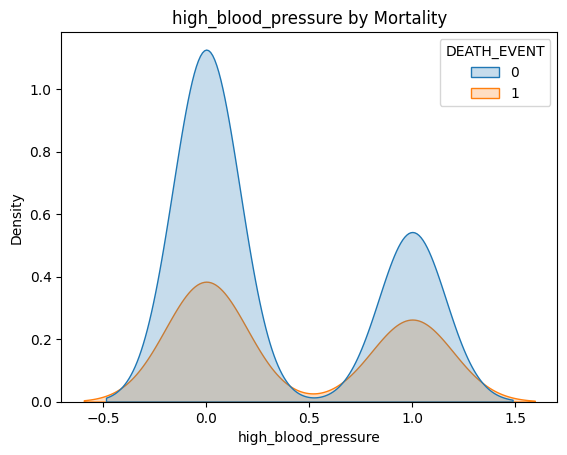

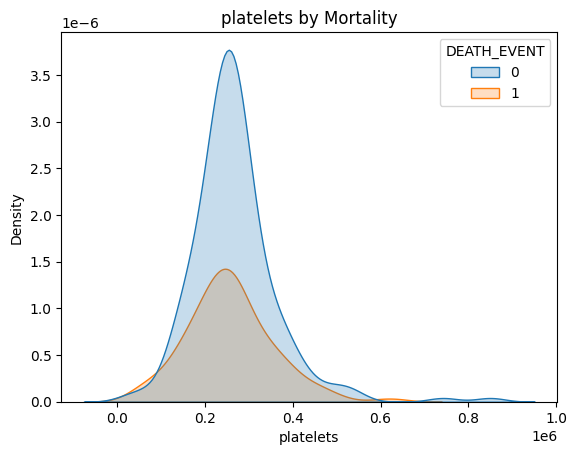

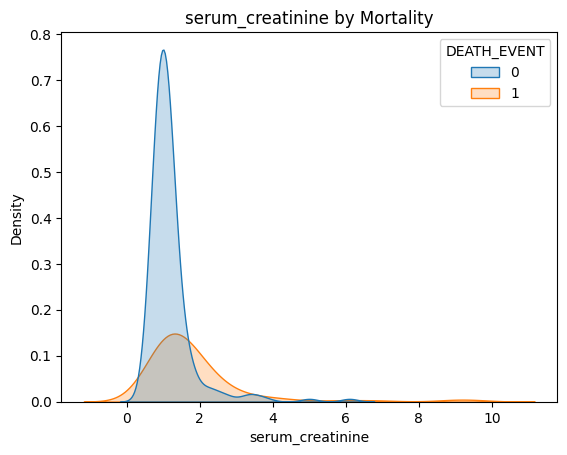

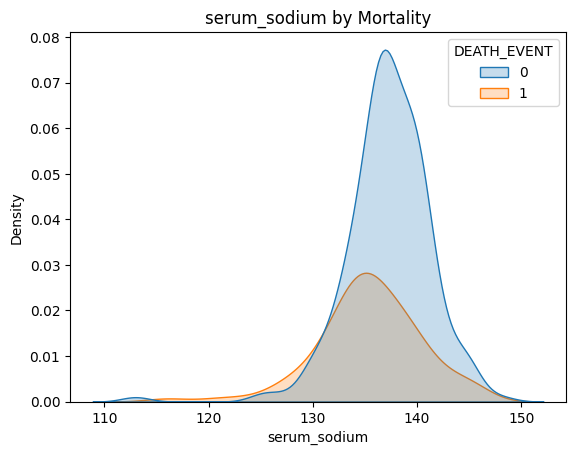

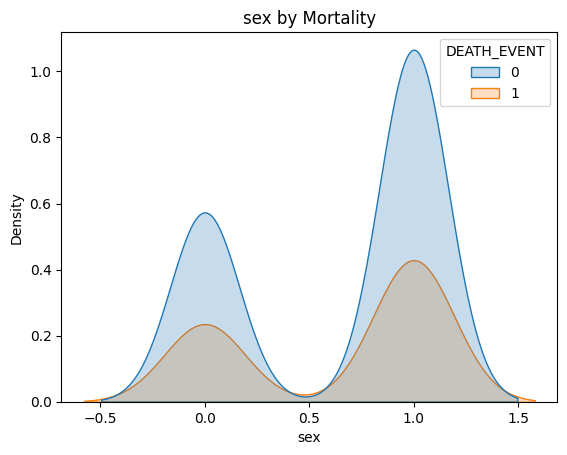

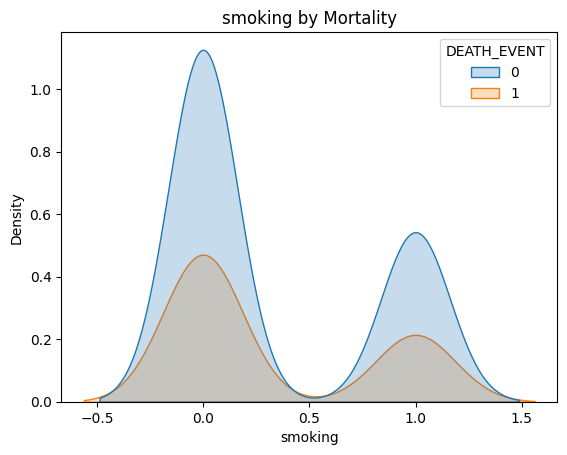

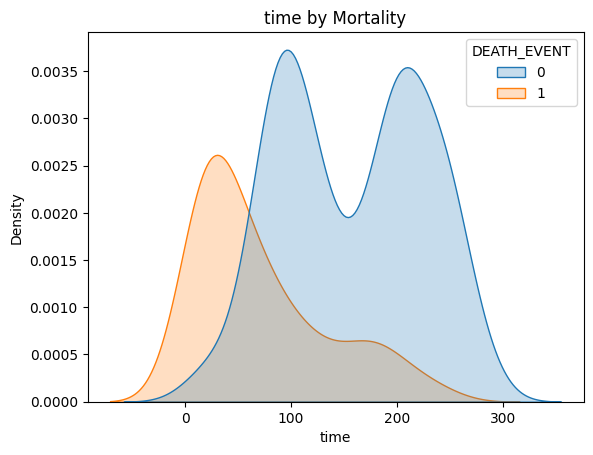

/tmp/ipython-input-1211632638.py:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



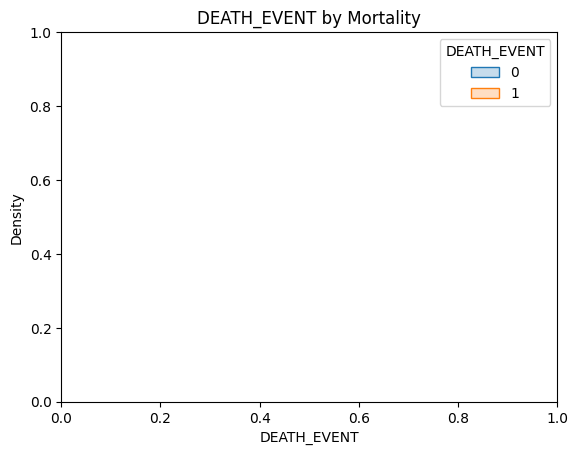

In [ ]:
column_list = df.columns.tolist()
column_list

for col in column_list:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue=target, fill=True)
    plt.title(f"{col} by Mortality")
    plt.show()

#### e. Boxplots by `DEATH EVENT` (Morality)

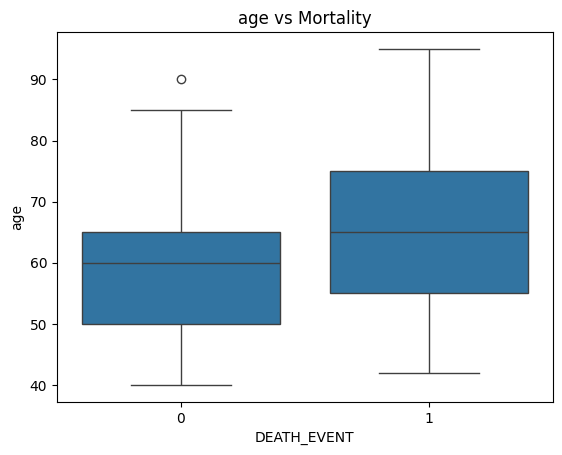

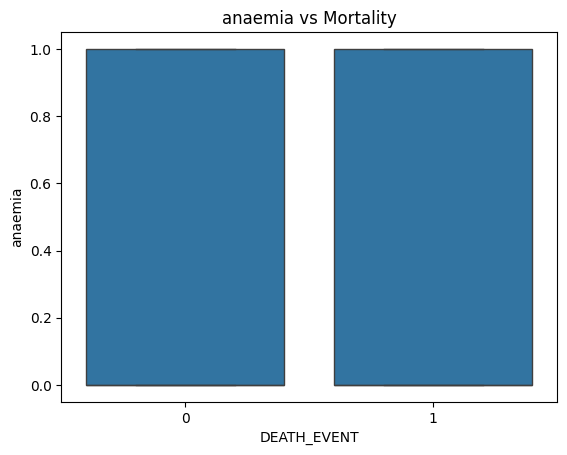

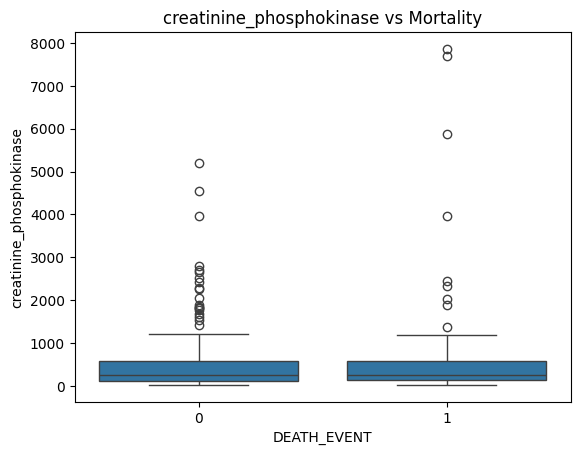

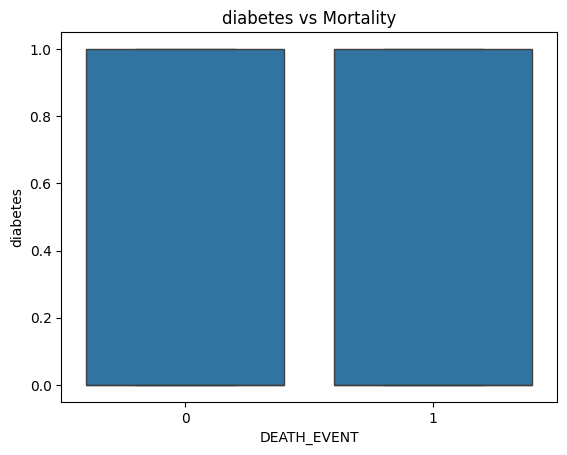

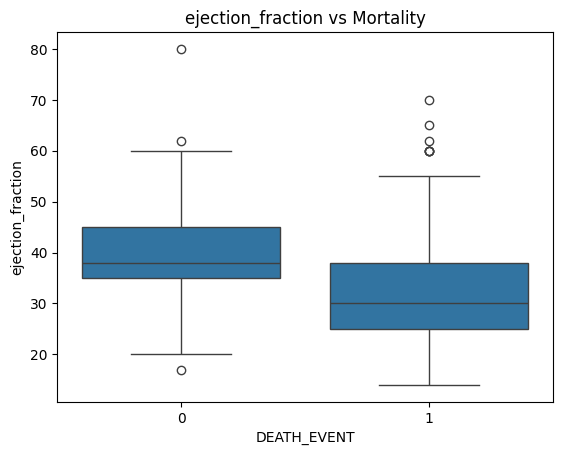

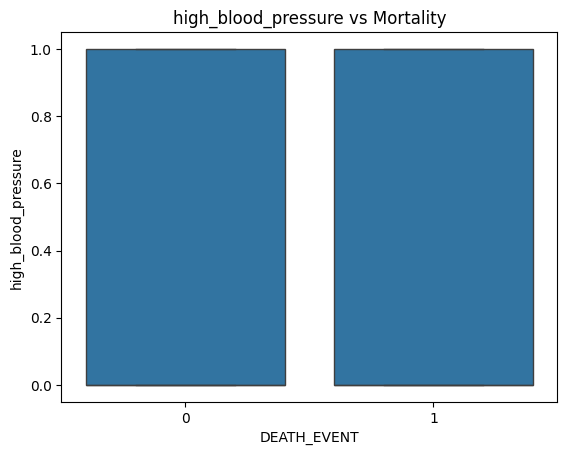

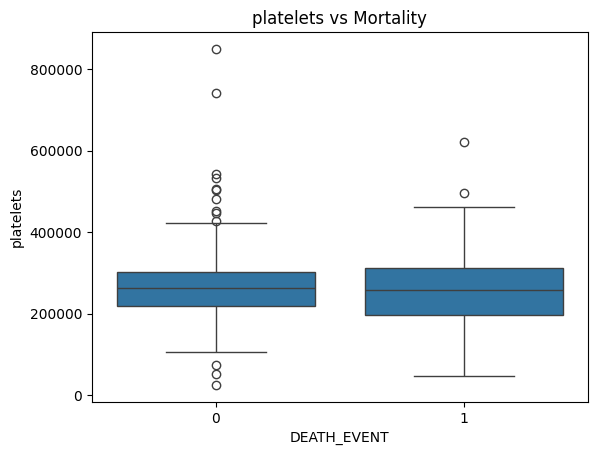

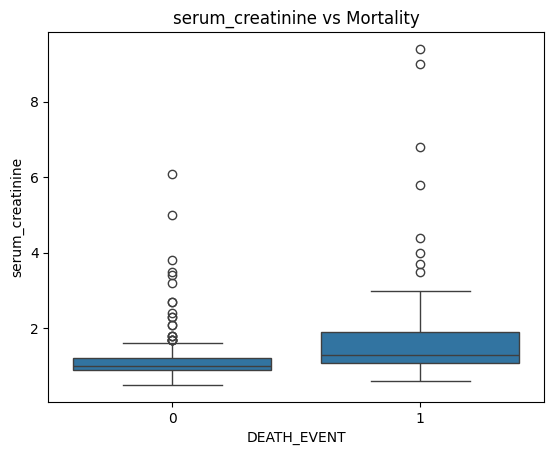

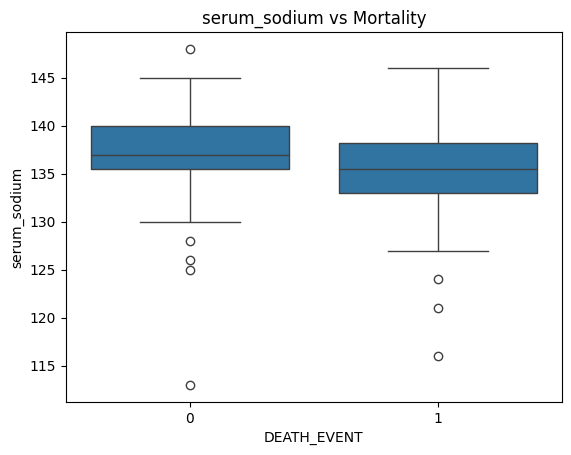

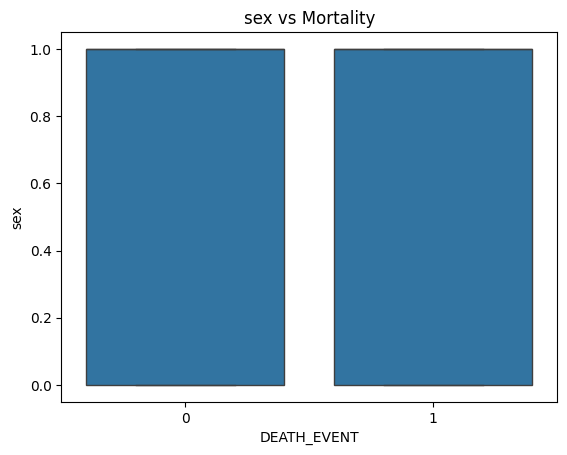

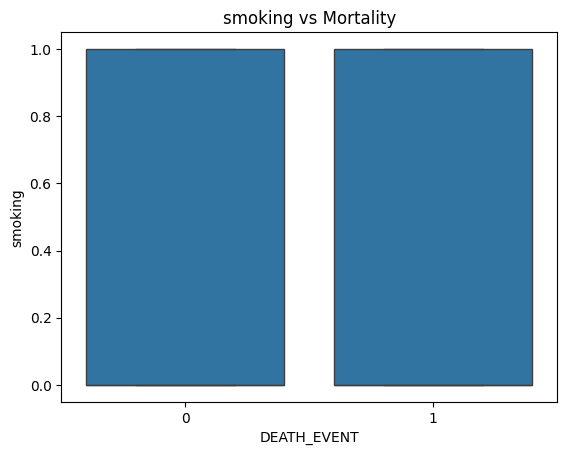

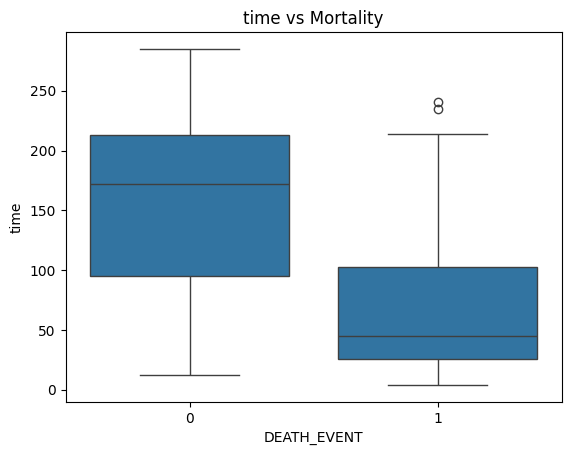

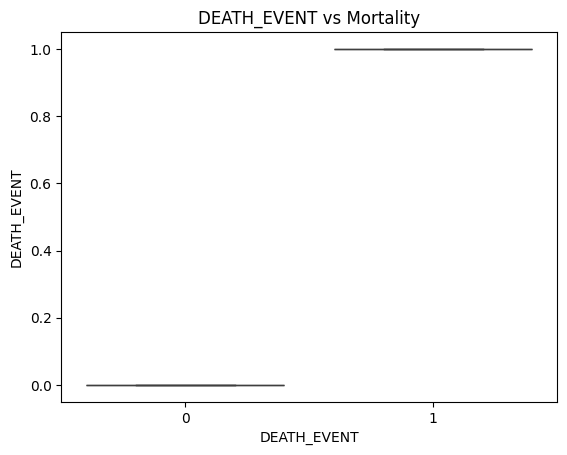

In [ ]:
for col in column_list:
    plt.figure()
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} vs Mortality")
    plt.show()

#### f. Correlation Analysis

* Heatmap

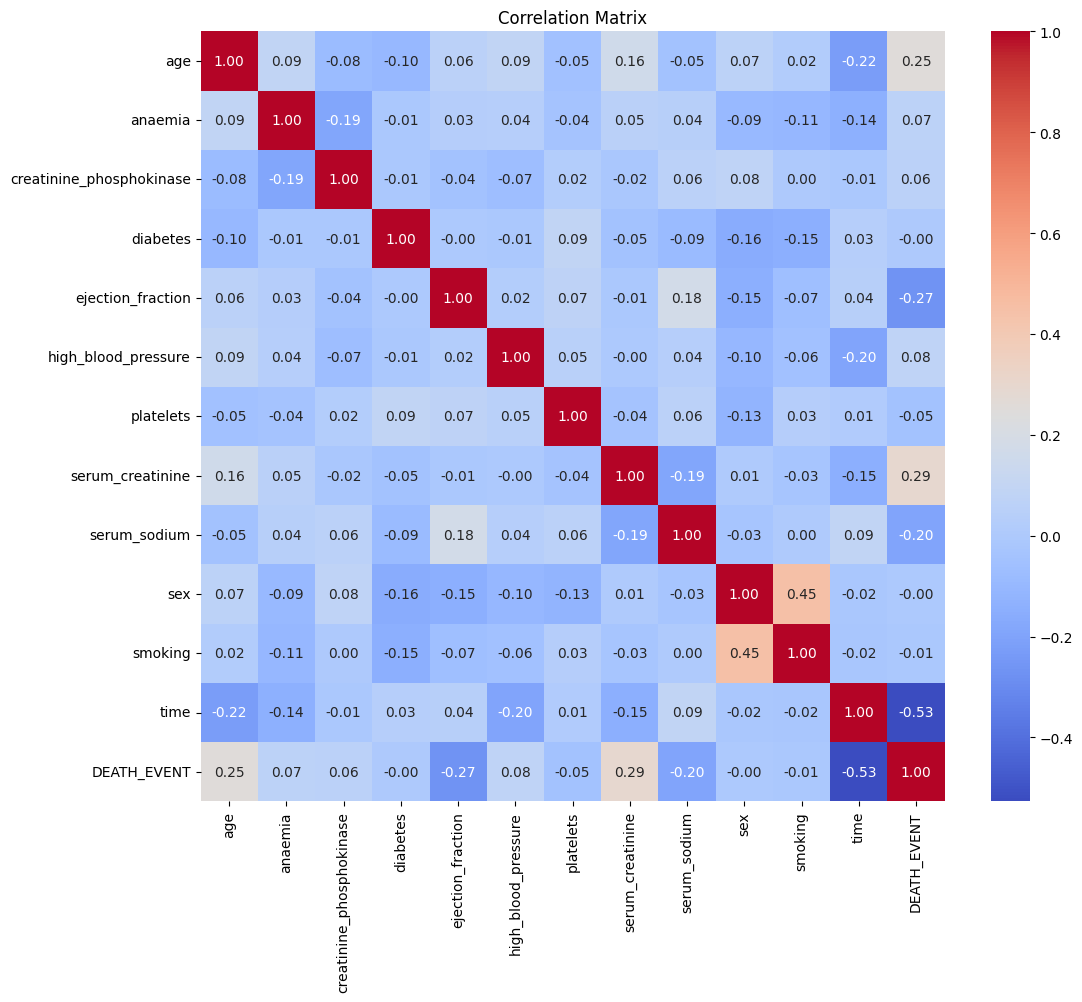

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

* Correlation with `DEATH_EVENT` (Mortality)

In [ ]:
df[column_list].corr()[target].sort_values(ascending=False)

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.294278
age,0.253729
high_blood_pressure,0.079351
anaemia,0.066270
creatinine_phosphokinase,0.062728
diabetes,-0.001943
sex,-0.004316
smoking,-0.012623
platelets,-0.049139


#### g. Pairwise Relationships

Selected features: ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']


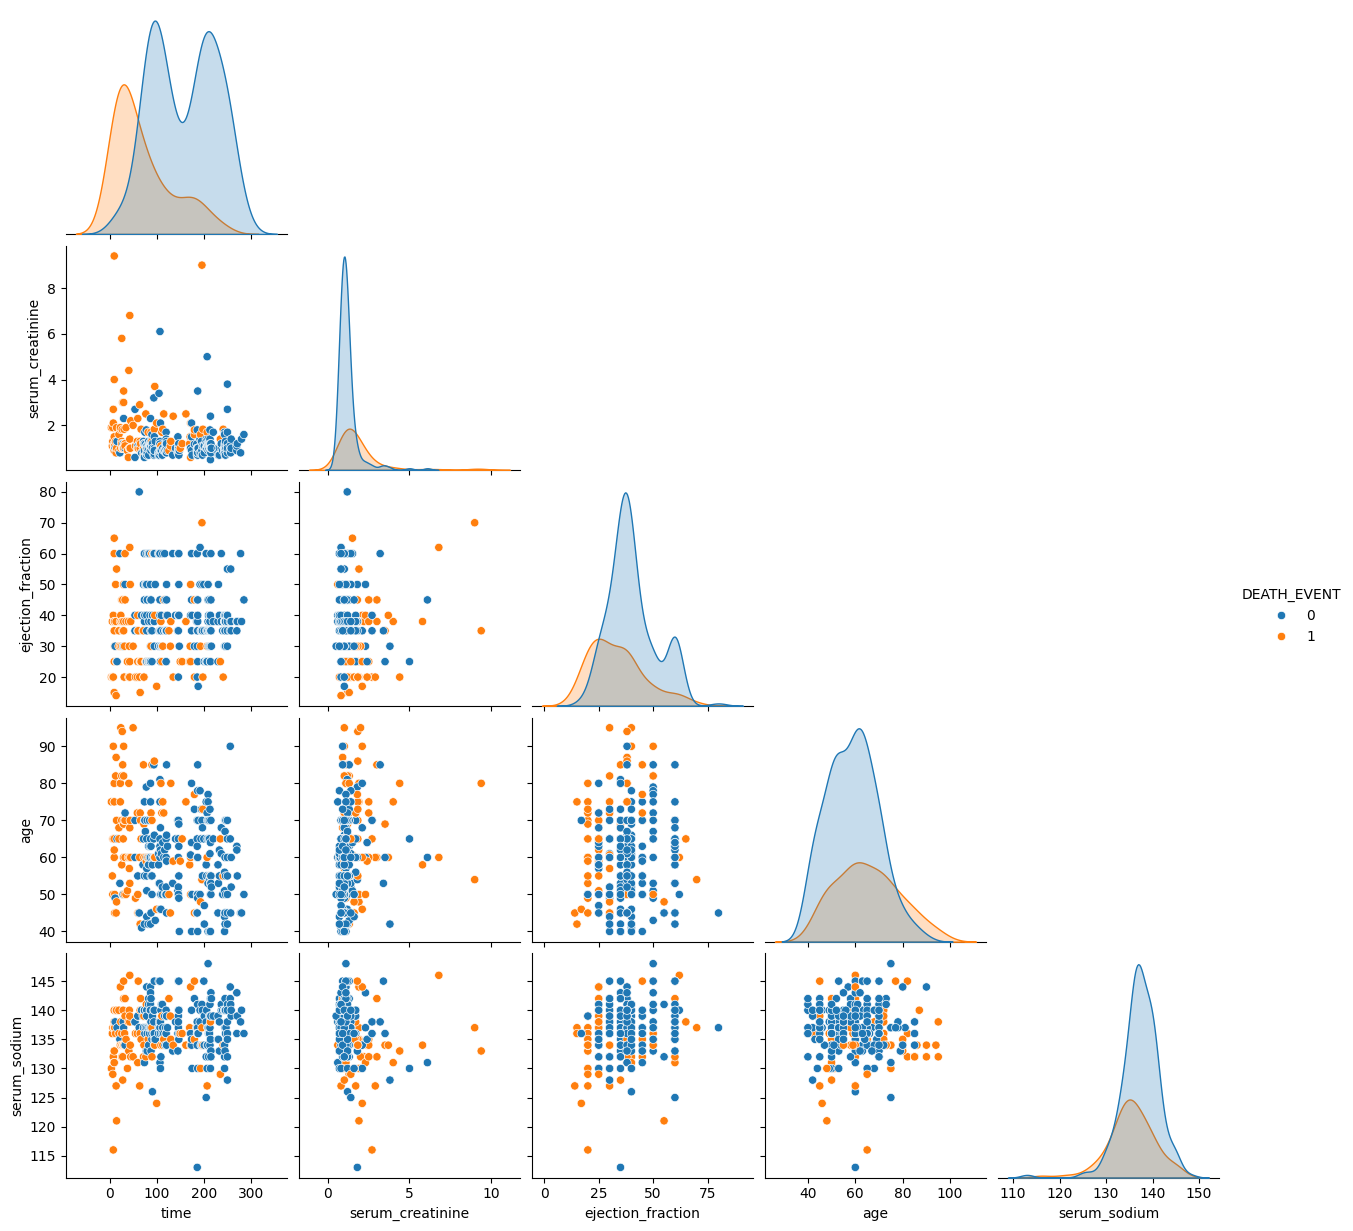

In [ ]:
k = 5  #choose 4–6

num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = [c for c in num_cols if c != target]

#correlation with binary target
corr_with_target = df[num_cols].corrwith(df[target]).abs().sort_values(ascending=False)
top_features = corr_with_target.head(k).index.tolist()

cols = top_features + [target]
plot_df = df[cols].copy()
plot_df[target] = plot_df[target].astype(int).astype("category")

print("Selected features:", top_features)

sns.pairplot(plot_df, hue=target, diag_kind="kde", corner=True)
plt.show()

#### h. Outlier Detection (IQR Method)

In [ ]:
def outlier_summary(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).sum()
    return pd.Series(outliers).sort_values(ascending=False)

outlier_summary(df, column_list)

,0
creatinine_phosphokinase,29
serum_creatinine,29
platelets,21
serum_sodium,4
ejection_fraction,2
diabetes,0
anaemia,0
age,0
high_blood_pressure,0
sex,0


#### i. Feature Scaling Check

In [ ]:
df[column_list].std().sort_values(ascending=False)

,0
platelets,97804.236869
creatinine_phosphokinase,970.287881
time,77.614208
age,11.894809
ejection_fraction,11.834841
serum_sodium,4.412477
serum_creatinine,1.034510
anaemia,0.496107
diabetes,0.494067
high_blood_pressure,0.478136


j. Interactive Exploration

* Age x Ejection Fraction Scatterplot

In [ ]:
px.scatter(
    df,
    x="age",
    y="ejection_fraction",
    color=target,
    title="Age vs Ejection Fraction by Mortality"
)

* Follow-up Time x Serum Creatinine (Kidney Function & Survival)

In [ ]:
px.scatter(
    df,
    x="time",
    y="serum_creatinine",
    color="DEATH_EVENT",
    title="Follow-up Time vs Serum Creatinine"
)

* 3D Risk Space (Age x EF x Creatinine)

In [ ]:
px.scatter_3d(
    df,
    x="age",
    y="ejection_fraction",
    z="serum_creatinine",
    color="DEATH_EVENT",
    title="3D Clinical Risk Space for Mortality",
    opacity=0.7
)


## Final Model - Neural Network

#### Model Training

Our NN was trained with a batch size of 16, 50 epochs, and with the Adam optimizer at a learning rate of 0.001. We used the batch size of 16 as this would minimize validation loss and provide better gradients. We used the Adam optimizer with a learning rate of 0.001 as this is more stable for tabular datasets and would help produce a smoother convergence.
We learned our learning rate by running the NN multiple times with different learning rates. We benchmarked each learning rate by comparing the AUC and acccuracy. The learning rate we chose was 0.001 because it generated the best AUC and accuracy score.

In [ ]:
x = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

#training and testing split
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.25, random_state=SEED, stratify = y
)

#standardization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [ ]:
#constructing the neural network

model = Sequential([
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

adam_optimizer = Adam(learning_rate=0.001) #specified our learning rate with optimizer

#model compilation
model.compile(optimizer= adam_optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train_scaled, y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4916 - loss: 0.7097 - val_accuracy: 0.5200 - val_loss: 0.7359
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5684 - loss: 0.6772 - val_accuracy: 0.5600 - val_loss: 0.7079
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6315 - loss: 0.6516 - val_accuracy: 0.6000 - val_loss: 0.6845
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6647 - loss: 0.6285 - val_accuracy: 0.6133 - val_loss: 0.6639
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6867 - loss: 0.6076 - val_accuracy: 0.6400 - val_loss: 0.6469
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7023 - loss: 0.5879 - val_accuracy: 0.6267 - val_loss: 0.6316
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7076 - loss: 0.5689 - val_accuracy: 0.6533 - val_loss: 0.6166
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7136 - loss: 0.5512 - val_accuracy: 0.7067 - val

#### Model Assessment

The first metric used to assess the performance of the NN was the accuracy. The accuracy tells us the proportion of correct prediction, which is very helpful and appropriate, however when it comes to the a medical dataset such as the one we are studying it is not enough to rely on it. So in addition to the accuracy we found the AUC and ROC because it helps us measure the model's ability to decide between survival and death at all classification thresholds.

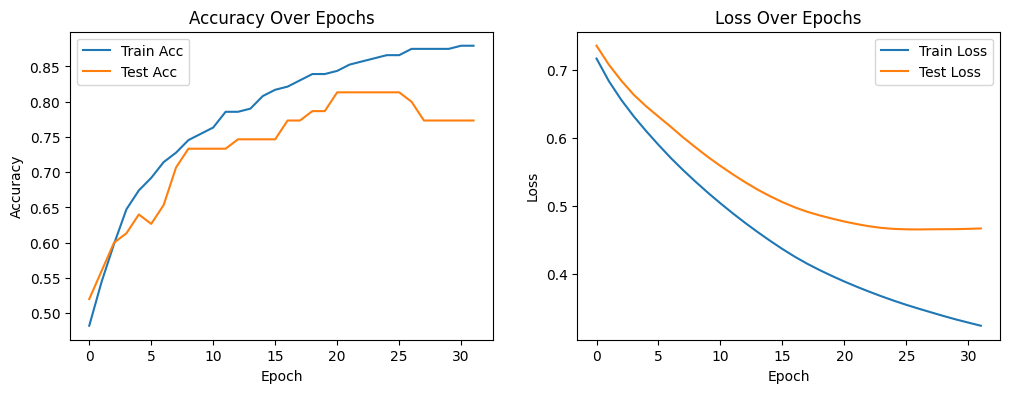

In [ ]:
#plotting the accuracy

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Test Acc')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

#plotting the loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


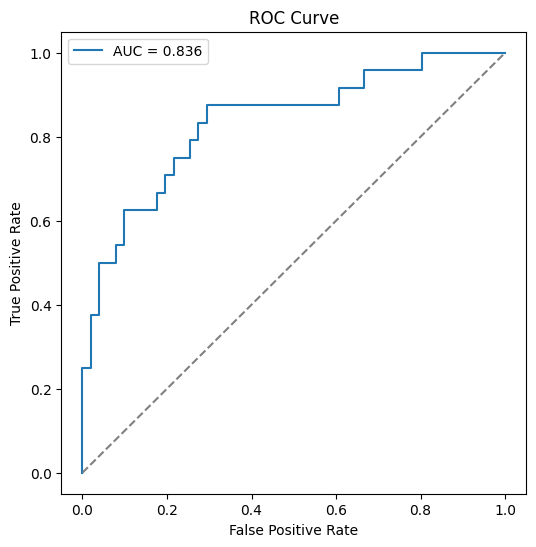

AUC: 0.8357843137254902


In [ ]:
y_pred_prob = model.predict(x_val_scaled)

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("AUC:", roc_auc)

## Additional Models and Analysis Discussed in Appendix

Code for the logistic regression and random forest methods can be found in the GitHub repository. All other corresponding code was submitted as part of project check-ins.